In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def figures(history, figure_name="plots"):
    """ method to visualize accuracies and loss vs epoch for training as well as testind data\n
        Argumets: history     = an instance returned by model.fit method\n
                  figure_name = a string representing file name to plots. By default it is set to "plots" \n
       Usage: hist = model.fit(X,y)\n              figures(hist) """
    from keras.callbacks import History
    if isinstance(history, History):
        hist = history.history
        epoch = history.epoch
        acc = hist['acc']
        loss = hist['loss']
        val_loss = hist['val_loss']
        val_acc = hist['val_acc']
        plt.figure(1)

        plt.subplot(221)
        plt.plot(epoch, acc)
        plt.title("Training accuracy vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")

        plt.subplot(222)
        plt.plot(epoch, loss)
        plt.title("Training loss vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        plt.subplot(223)
        plt.plot(epoch, val_acc)
        plt.title("Validation Acc vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Validation Accuracy")

        plt.subplot(224)
        plt.plot(epoch, val_loss)
        plt.title("Validation loss vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Validation Loss")
        plt.tight_layout()
        plt.savefig(figure_name)
    else:
        print("Input Argument is not an instance of class History")

/home/yaoxingliu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# part1: train data

In [2]:
# generate 100 numbers from -2pi to 2pi
# array: [1000, ]
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
x_train

array([-6.28318531, -6.27060636, -6.25802741, -6.24544846, -6.23286951,
       -6.22029056, -6.20771161, -6.19513266, -6.18255371, -6.16997476,
       -6.15739581, -6.14481686, -6.13223791, -6.11965896, -6.10708001,
       -6.09450106, -6.08192211, -6.06934316, -6.05676422, -6.04418527,
       -6.03160632, -6.01902737, -6.00644842, -5.99386947, -5.98129052,
       -5.96871157, -5.95613262, -5.94355367, -5.93097472, -5.91839577,
       -5.90581682, -5.89323787, -5.88065892, -5.86807997, -5.85550102,
       -5.84292207, -5.83034312, -5.81776417, -5.80518522, -5.79260627,
       -5.78002732, -5.76744838, -5.75486943, -5.74229048, -5.72971153,
       -5.71713258, -5.70455363, -5.69197468, -5.67939573, -5.66681678,
       -5.65423783, -5.64165888, -5.62907993, -5.61650098, -5.60392203,
       -5.59134308, -5.57876413, -5.56618518, -5.55360623, -5.54102728,
       -5.52844833, -5.51586938, -5.50329043, -5.49071148, -5.47813254,
       -5.46555359, -5.45297464, -5.44039569, -5.42781674, -5.41

In [3]:
# reshape to matrix with [1000,1]
x_train = np.array(x_train).reshape((len(x_train), 1))
x_train

array([[-6.28318531],
       [-6.27060636],
       [-6.25802741],
       [-6.24544846],
       [-6.23286951],
       [-6.22029056],
       [-6.20771161],
       [-6.19513266],
       [-6.18255371],
       [-6.16997476],
       [-6.15739581],
       [-6.14481686],
       [-6.13223791],
       [-6.11965896],
       [-6.10708001],
       [-6.09450106],
       [-6.08192211],
       [-6.06934316],
       [-6.05676422],
       [-6.04418527],
       [-6.03160632],
       [-6.01902737],
       [-6.00644842],
       [-5.99386947],
       [-5.98129052],
       [-5.96871157],
       [-5.95613262],
       [-5.94355367],
       [-5.93097472],
       [-5.91839577],
       [-5.90581682],
       [-5.89323787],
       [-5.88065892],
       [-5.86807997],
       [-5.85550102],
       [-5.84292207],
       [-5.83034312],
       [-5.81776417],
       [-5.80518522],
       [-5.79260627],
       [-5.78002732],
       [-5.76744838],
       [-5.75486943],
       [-5.74229048],
       [-5.72971153],
       [-5

In [4]:
# generate a matrix with size [len(x),1], value in (0,1),array: [1000,1]
n = 0.1*np.random.rand(len(x_train), 1)
n

array([[4.01629030e-02],
       [2.98600815e-02],
       [4.26448484e-02],
       [8.96019258e-02],
       [1.36708229e-02],
       [7.54262913e-02],
       [8.92137048e-02],
       [8.07233008e-02],
       [7.88286345e-02],
       [5.14482185e-02],
       [8.01913457e-02],
       [3.02462549e-02],
       [5.47079083e-02],
       [6.17904936e-02],
       [9.25728679e-02],
       [4.59269374e-02],
       [9.25807690e-02],
       [4.13226758e-03],
       [8.91455052e-02],
       [2.25260950e-02],
       [4.39238445e-02],
       [6.20473715e-02],
       [3.82848648e-02],
       [4.44416709e-02],
       [8.78370334e-02],
       [7.40232222e-02],
       [6.49669620e-02],
       [4.14371564e-02],
       [7.24898697e-02],
       [9.93937387e-02],
       [8.09097287e-02],
       [8.90978371e-02],
       [7.73228565e-02],
       [8.83992874e-03],
       [7.13390007e-02],
       [4.60558837e-03],
       [2.79883494e-02],
       [3.35279883e-02],
       [3.15527797e-02],
       [9.88616159e-02],


In [5]:
y_train = np.sin(x_train) + n
y_train

array([[ 4.01629030e-02],
       [ 4.24386993e-02],
       [ 6.78000938e-02],
       [ 1.27329819e-01],
       [ 6.39653932e-02],
       [ 1.38279581e-01],
       [ 1.64615769e-01],
       [ 1.68662209e-01],
       [ 1.79290472e-01],
       [ 1.64417090e-01],
       [ 2.05649376e-01],
       [ 1.68173593e-01],
       [ 2.05082730e-01],
       [ 2.24589006e-01],
       [ 2.67769311e-01],
       [ 2.33493591e-01],
       [ 2.92487954e-01],
       [ 2.16348354e-01],
       [ 3.13636914e-01],
       [ 2.59257305e-01],
       [ 2.92857399e-01],
       [ 3.23143882e-01],
       [ 3.11503018e-01],
       [ 3.29738237e-01],
       [ 3.85166870e-01],
       [ 3.83339284e-01],
       [ 3.86220306e-01],
       [ 3.74576951e-01],
       [ 4.17463403e-01],
       [ 4.56146427e-01],
       [ 4.49385123e-01],
       [ 4.69237635e-01],
       [ 4.69066909e-01],
       [ 4.12126251e-01],
       [ 4.86103782e-01],
       [ 4.30783201e-01],
       [ 4.65511360e-01],
       [ 4.82327168e-01],
       [ 4.9

In [6]:
# 训练数据集：零均值单位方差
x_train = preprocessing.scale(x_train)
x_train

array([[-1.73031962],
       [-1.72685552],
       [-1.72339142],
       [-1.71992731],
       [-1.71646321],
       [-1.71299911],
       [-1.709535  ],
       [-1.7060709 ],
       [-1.7026068 ],
       [-1.69914269],
       [-1.69567859],
       [-1.69221449],
       [-1.68875038],
       [-1.68528628],
       [-1.68182218],
       [-1.67835807],
       [-1.67489397],
       [-1.67142987],
       [-1.66796576],
       [-1.66450166],
       [-1.66103755],
       [-1.65757345],
       [-1.65410935],
       [-1.65064524],
       [-1.64718114],
       [-1.64371704],
       [-1.64025293],
       [-1.63678883],
       [-1.63332473],
       [-1.62986062],
       [-1.62639652],
       [-1.62293242],
       [-1.61946831],
       [-1.61600421],
       [-1.61254011],
       [-1.609076  ],
       [-1.6056119 ],
       [-1.6021478 ],
       [-1.59868369],
       [-1.59521959],
       [-1.59175549],
       [-1.58829138],
       [-1.58482728],
       [-1.58136318],
       [-1.57789907],
       [-1

In [7]:
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
y_train = scaler.transform(y_train)
y_train

array([[ 4.01629030e-02],
       [ 4.24386993e-02],
       [ 6.78000938e-02],
       [ 1.27329819e-01],
       [ 6.39653932e-02],
       [ 1.38279581e-01],
       [ 1.64615769e-01],
       [ 1.68662209e-01],
       [ 1.79290472e-01],
       [ 1.64417090e-01],
       [ 2.05649376e-01],
       [ 1.68173593e-01],
       [ 2.05082730e-01],
       [ 2.24589006e-01],
       [ 2.67769311e-01],
       [ 2.33493591e-01],
       [ 2.92487954e-01],
       [ 2.16348354e-01],
       [ 3.13636914e-01],
       [ 2.59257305e-01],
       [ 2.92857399e-01],
       [ 3.23143882e-01],
       [ 3.11503018e-01],
       [ 3.29738237e-01],
       [ 3.85166870e-01],
       [ 3.83339284e-01],
       [ 3.86220306e-01],
       [ 3.74576951e-01],
       [ 4.17463403e-01],
       [ 4.56146427e-01],
       [ 4.49385123e-01],
       [ 4.69237635e-01],
       [ 4.69066909e-01],
       [ 4.12126251e-01],
       [ 4.86103782e-01],
       [ 4.30783201e-01],
       [ 4.65511360e-01],
       [ 4.82327168e-01],
       [ 4.9

In [9]:
print(x_train.shape)

(1000, 1)


# Test data

In [10]:
x_test = np.linspace(-5, 5, 2000)
x_test = np.array(x_test).reshape((len(x_test), 1))
y_test = np.sin(x_test)
print(x_test, "\n----------------------------\n",  y_test)

[[-5.       ]
 [-4.9949975]
 [-4.989995 ]
 ...
 [ 4.989995 ]
 [ 4.9949975]
 [ 5.       ]] 
----------------------------
 [[ 0.95892427]
 [ 0.96033129]
 [ 0.96171427]
 ...
 [-0.96171427]
 [-0.96033129]
 [-0.95892427]]


In [11]:
# 零均值单位方差
x_test = scaler.transform(x_test)
x_test

array([[-5.       ],
       [-4.9949975],
       [-4.989995 ],
       ...,
       [ 4.989995 ],
       [ 4.9949975],
       [ 5.       ]])

# prediction data

In [12]:
x_prd = np.linspace(-3, 3, 101)
x_prd = np.array(x_prd).reshape((len(x_prd), 1))
x_prd = scaler.transform(x_prd)
y_prd = np.sin(x_prd)
print(x_prd, "\n-------------\n", y_prd)


[[-3.00000000e+00]
 [-2.94000000e+00]
 [-2.88000000e+00]
 [-2.82000000e+00]
 [-2.76000000e+00]
 [-2.70000000e+00]
 [-2.64000000e+00]
 [-2.58000000e+00]
 [-2.52000000e+00]
 [-2.46000000e+00]
 [-2.40000000e+00]
 [-2.34000000e+00]
 [-2.28000000e+00]
 [-2.22000000e+00]
 [-2.16000000e+00]
 [-2.10000000e+00]
 [-2.04000000e+00]
 [-1.98000000e+00]
 [-1.92000000e+00]
 [-1.86000000e+00]
 [-1.80000000e+00]
 [-1.74000000e+00]
 [-1.68000000e+00]
 [-1.62000000e+00]
 [-1.56000000e+00]
 [-1.50000000e+00]
 [-1.44000000e+00]
 [-1.38000000e+00]
 [-1.32000000e+00]
 [-1.26000000e+00]
 [-1.20000000e+00]
 [-1.14000000e+00]
 [-1.08000000e+00]
 [-1.02000000e+00]
 [-9.60000000e-01]
 [-9.00000000e-01]
 [-8.40000000e-01]
 [-7.80000000e-01]
 [-7.20000000e-01]
 [-6.60000000e-01]
 [-6.00000000e-01]
 [-5.40000000e-01]
 [-4.80000000e-01]
 [-4.20000000e-01]
 [-3.60000000e-01]
 [-3.00000000e-01]
 [-2.40000000e-01]
 [-1.80000000e-01]
 [-1.20000000e-01]
 [-6.00000000e-02]
 [ 1.13686838e-16]
 [ 6.00000000e-02]
 [ 1.2000000

# Create model

In [13]:
model = Sequential()
model.add(Dense(100, kernel_initializer='uniform', input_dim=1))
model.add(Activation(LeakyReLU(alpha=0.01)))
# model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation(LeakyReLU(alpha=0.1)))
# model.add(Activation('relu'))

model.add(Dense(1))
# model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(Activation('tanh'))

# model.compile(loss='mean_squared_error', optimizer="rmsprop", metrics=["accuracy"])
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=["accuracy"])

/home/yaoxingliu/anaconda3/lib/python3.6/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [20]:
# hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, shuffle=True, verbose=0, validation_split=0.15)
hist = model.fit(x_test, y_test, batch_size=10, epochs=30, shuffle=True, verbose=1, validation_split=0.2)
# print(hist.history)

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 0s 179us/step - loss: 1.7041e-04 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 2/30
1600/1600 [==============================] - 0s 178us/step - loss: 1.7109e-04 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 3/30
1600/1600 [==============================] - 0s 180us/step - loss: 1.6379e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 4/30
1600/1600 [==============================] - 0s 179us/step - loss: 1.6768e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 5/30
1600/1600 [==============================] - 0s 178us/step - loss: 1.6751e-04 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 6/30
1600/1600 [==============================] - 0s 189us/step - loss: 1.6242e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 7/30
1600/1600 [==============================] - 0s 183us/

In [15]:
score = model.evaluate(x_test, y_test, batch_size=10)
# score = model.evaluate(x_train, y_train, batch_size=10)

out = model.predict(x_prd, batch_size=1)

2000/2000 [==============================] - 0s 66us/step


# plot prediction data

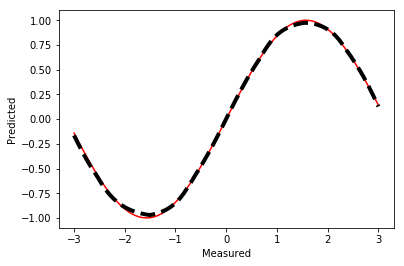

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.plot(x_prd, y_prd, 'r')
ax.plot(x_prd, out, 'k--', lw=4)

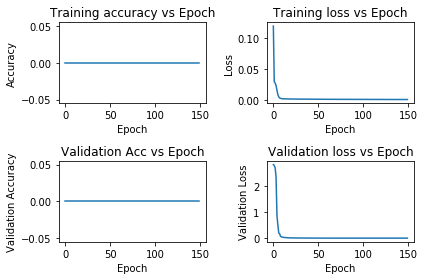

In [17]:
figures(hist)

In [18]:
print(score)

[0.0009508781013191125, 0.0]
